# Train 3 Layer NN

In [1]:
import numpy as np
import random
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [2]:
import keras
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense
from keras.optimizers import Adam

e:\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


## Generate Fake Data

In [3]:
X_train = []
y_train = []

In [4]:
for i in range(50):
    random_young = random.randint(13, 64)
    X_train.append(random_young)
    y_train.append(0)
    
    random_old = random.randint(65, 100)
    X_train.append(random_old)
    y_train.append(1)
    
for i in range(1000):
    random_young = random.randint(13, 64)
    X_train.append(random_young)
    y_train.append(1)
    
    random_old = random.randint(65, 100)
    X_train.append(random_old)
    y_train.append(0)

In [5]:
X_train = np.array(X_train)
y_train = np.array(y_train)

print(X_train.shape)
print(y_train.shape)

(2100,)
(2100,)


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, train_size=0.8)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, train_size=0.75)

## Preprocessing

In [7]:
scaler = MinMaxScaler(feature_range=(0, 1))
X_train_scaled = scaler.fit_transform((X_train).reshape(-1, 1))
X_test_scaled = scaler.fit_transform((X_test).reshape(-1, 1))
X_val_scaled = scaler.fit_transform((X_val).reshape(-1, 1))

e:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [8]:
print(max(X_train))
print(min(X_train))
print(max(X_train_scaled))
print(min(X_train_scaled))

100
13
[1.]
[0.]


## Build NN

In [9]:
model = keras.models.Sequential([
    Dense(16, input_shape=(1,), activation='relu'),
    Dense(32, activation='relu'),
    Dense(2, activation='softmax')
])

In [10]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                32        
_________________________________________________________________
dense_2 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


## Train NN

In [11]:
model.compile(Adam(lr=.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [12]:
model.fit(X_train_scaled, y_train, validation_split=0.1,
          batch_size=10, epochs=20, shuffle=True, verbose=True)

Train on 1134 samples, validate on 126 samples
Epoch 1/20
1134/1134 [==============================] - 0s 258us/step - loss: 0.7253 - acc: 0.4533 - val_loss: 0.7128 - val_acc: 0.4841
Epoch 2/20
1134/1134 [==============================] - 0s 115us/step - loss: 0.7086 - acc: 0.4877 - val_loss: 0.6998 - val_acc: 0.5238
Epoch 3/20
1134/1134 [==============================] - 0s 118us/step - loss: 0.6942 - acc: 0.5335 - val_loss: 0.6879 - val_acc: 0.6270
Epoch 4/20
1134/1134 [==============================] - 0s 115us/step - loss: 0.6799 - acc: 0.6587 - val_loss: 0.6749 - val_acc: 0.6190
Epoch 5/20
1134/1134 [==============================] - 0s 112us/step - loss: 0.6652 - acc: 0.6843 - val_loss: 0.6629 - val_acc: 0.6270
Epoch 6/20
1134/1134 [==============================] - 0s 117us/step - loss: 0.6511 - acc: 0.6869 - val_loss: 0.6507 - val_acc: 0.6349
Epoch 7/20
1134/1134 [==============================] - 0s 111us/step - loss: 0.6361 - acc: 0.7072 - val_loss: 0.6364 - val_acc: 0.6667
E

## Predict data

In [13]:
predictions = model.predict(X_test_scaled, batch_size=10, verbose=0)

In [16]:
for index in range(10):
    print(predictions[index])

[0.82649326 0.17350674]
[0.80778575 0.19221418]
[0.7868804  0.21311966]
[0.7318715  0.26812845]
[0.85404783 0.14595215]
[0.84374243 0.15625753]
[0.48132578 0.5186742 ]
[0.7057174 0.2942826]
[0.8318381 0.1681619]
[0.24467738 0.7553226 ]


In [20]:
predictions_class = model.predict_classes(X_test_scaled, batch_size=10, verbose=0)

In [21]:
for index in range(10):
    print(predictions_class[index])

0
0
0
0
0
0
1
0
0
1


## Plot Confusion Matrix

In [23]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

In [25]:
cm = confusion_matrix(X_test, predictions_class)

In [26]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 2 0 ... 0 0 0]
 ...
 [5 0 0 ... 0 0 0]
 [4 0 0 ... 0 0 0]
 [7 0 0 ... 0 0 0]]


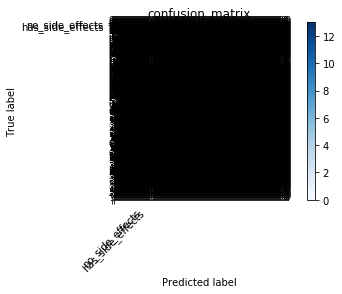

In [27]:
cm_plot_lables = ['no_side_effects', 'has_side_effects']
plot_confusion_matrix(cm, cm_plot_lables, title='confusion_matrix')